In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     12.35
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.59e-12
Time:                        08:03:27   Log-Likelihood:                 51.226
No. Observations:                 120   AIC:                            -84.45
Df Residuals:                     111   BIC:                            -59.37
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2621      0.111      2.362      0.0

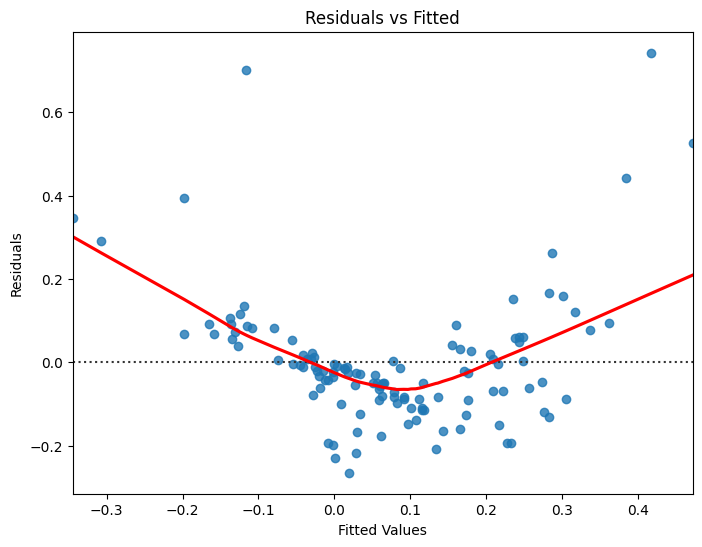

<Figure size 800x600 with 0 Axes>

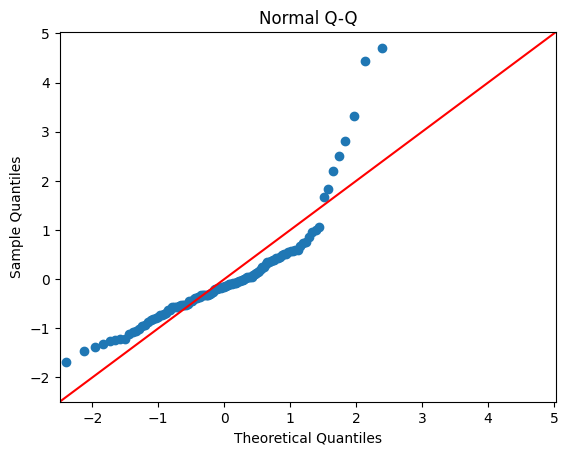

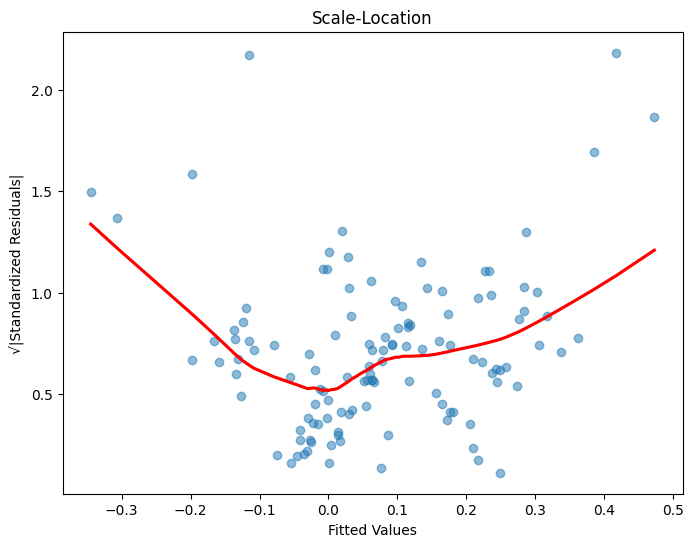

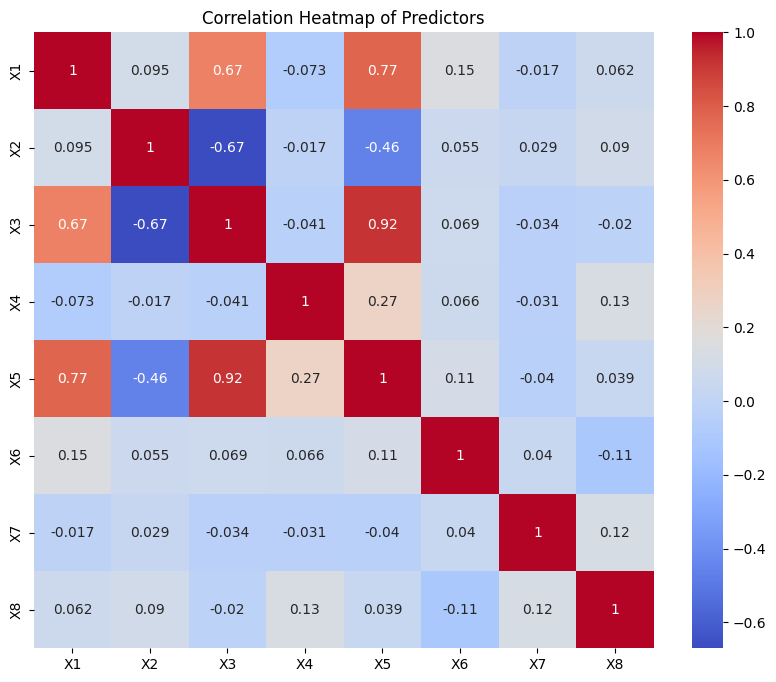

In [ ]:
# Re-load the dataset properly
df = pd.read_csv("/content/drive/MyDrive/new.csv", header=None)

# Assign column names manually
df.columns = [f'X{i}' for i in range(1, df.shape[1])]+['y']  # Assuming last column is the target (dependent variable)

# Step 2: Define independent (X) and dependent (y) variables
X = df.drop(columns=['y'])
y = df['y']

# Step 3: Add a constant term for intercept
import statsmodels.api as sm
X_const = sm.add_constant(X)

# Step 4: Fit the Multiple Linear Regression (MLR) model
model = sm.OLS(y, X_const).fit()

# Step 5: Print model summary
print(model.summary())

# Step 6: Get the fitted values and residuals
fitted_vals = model.fittedvalues
residuals = model.resid
standardized_residuals = model.get_influence().resid_studentized_internal
leverage = model.get_influence().hat_matrix_diag
cooks = model.get_influence().cooks_distance[0]

# Step 7: Plot the key diagnostic graphs
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Residuals vs Fitted
plt.figure(figsize=(8,6))
sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# Normal Q-Q Plot
plt.figure(figsize=(8,6))
qqplot(residuals, line='45', fit=True)
plt.title('Normal Q-Q')
plt.show()

# Scale-Location Plot
plt.figure(figsize=(8,6))
plt.scatter(fitted_vals, np.sqrt(np.abs(standardized_residuals)), alpha=0.5)
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(standardized_residuals)),
            lowess=True, scatter=False, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('√|Standardized Residuals|')
plt.title('Scale-Location')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Predictors')
plt.show()


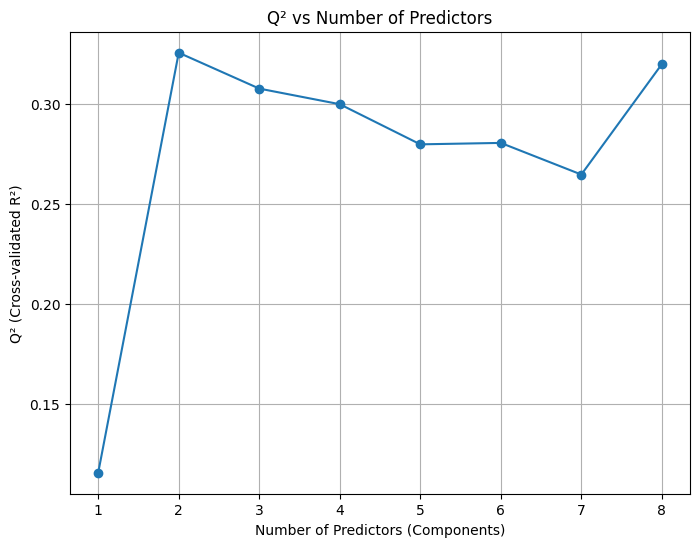

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming X and y are already defined from your earlier code

q2_scores = []

# Loop over number of predictors (from 1 to total predictors)
for i in range(1, X.shape[1]+1):
    selected_features = X.iloc[:, :i]  # Take first i predictors

    model = LinearRegression()
    y_pred_cv = cross_val_predict(model, selected_features, y, cv=5)  # 5-Fold Cross Validation

    q2 = r2_score(y, y_pred_cv)
    q2_scores.append(q2)

# Plotting Q² vs Number of Components
plt.figure(figsize=(8,6))
plt.plot(range(1, X.shape[1]+1), q2_scores, marker='o')
plt.xlabel('Number of Predictors (Components)')
plt.ylabel('Q² (Cross-validated R²)')
plt.title('Q² vs Number of Predictors')
plt.grid(True)
plt.show()


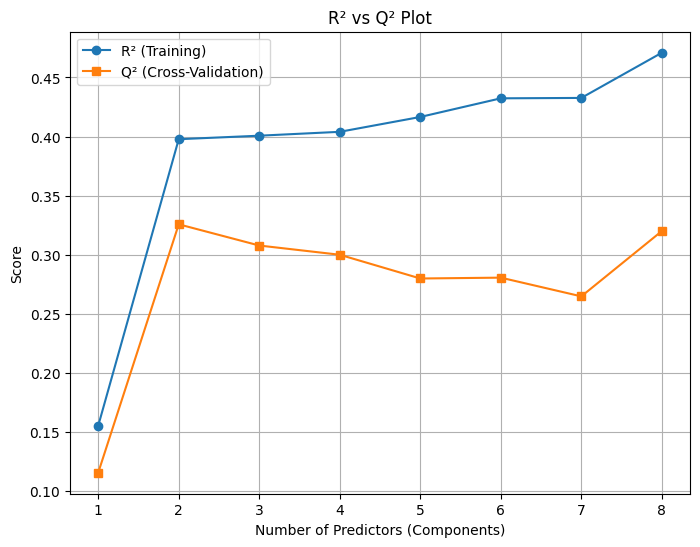

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming X and y are already defined

r2_scores = []
q2_scores = []

# Loop over number of predictors
for i in range(1, X.shape[1]+1):
    selected_features = X.iloc[:, :i]  # Use first i predictors

    model = LinearRegression()

    # R² on training data
    model.fit(selected_features, y)
    y_pred_train = model.predict(selected_features)
    r2 = r2_score(y, y_pred_train)
    r2_scores.append(r2)

    # Q² from cross-validation
    y_pred_cv = cross_val_predict(model, selected_features, y, cv=5)
    q2 = r2_score(y, y_pred_cv)
    q2_scores.append(q2)

# Plotting R² and Q²
plt.figure(figsize=(8,6))
plt.plot(range(1, X.shape[1]+1), r2_scores, marker='o', label='R² (Training)')
plt.plot(range(1, X.shape[1]+1), q2_scores, marker='s', label='Q² (Cross-Validation)')
plt.xlabel('Number of Predictors (Components)')
plt.ylabel('Score')
plt.title('R² vs Q² Plot')
plt.legend()
plt.grid(True)
plt.show()
